In [1]:
from bs4 import BeautifulSoup
import os
import pandas as pd
import requests
import json
import warnings
warnings.filterwarnings("ignore")

Code to prevent crwaling blocking by creating IPs

In [2]:
l={}
u=list()
url= "https://www.proxynova.com/proxy-server-list/country-ISO 3166-2:IL/"
respo = requests.get(url).text
soup = BeautifulSoup(respo, "html.parser")
allproxy = soup.find_all("tr")
for proxy in allproxy:
    foo = proxy.find_all("td")
try: 
    l["ip"]=foo[0].text.replace("\n","").replace("document.write(","").replace(")","").replace("\'","").replace(";","")
except:
    l["ip"]=None
try:
    l["port"]=foo[1].text.replace("\n","").replace(" ","")
except:
    l["port"]=None
try:
    l["country"]=foo[5].text.replace("\n","").replace(" ","")
except:
    l["country"]=None
if(l["port"] is not None):
    u.append(l)
l={}
print(u)

[]


In this section we extract two groups of animals into two lists:

    1. Social animals - http://animalia.bio/social-animals
    2. Nocturnal animals - http://animalia.bio/nocturnal
    
Those two lists will be two columns in our future dataframe.
    
After extracting, we will convert the two lists into two files text.

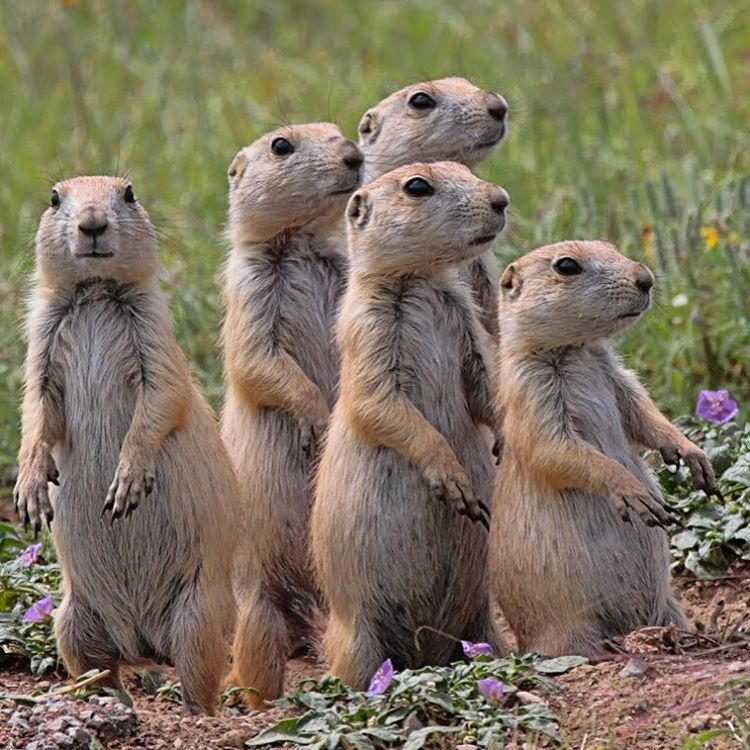

In [3]:
social_animals_url = "http://animalia.bio/social-animals"
nocturnal_animals_url = "http://animalia.bio/nocturnal"

response_social = requests.get(social_animals_url)
response_nocturnal = requests.get(nocturnal_animals_url)

social_soup = BeautifulSoup(response_social.content, "html.parser")
nocturnal_soup = BeautifulSoup(response_nocturnal.content, "html.parser")

This function gets a social/nocturnal page and return all animals' scientific names which located at this specific page.

In [4]:
def get_scientific_name(animal_soup):
    tag_animals = animal_soup.find("div", attrs = {"class":"animals"})
    animals_scientific_names = [i.text for i in tag_animals.findAll("div", attrs = {"class":"scientific_name"})]
    return animals_scientific_names

This function gets current page and return the next page.

In [5]:
def get_next_page(current_page): 
    tag_next_pages = current_page.find("div", attrs = {"class":"paginator"})
    pages = [i['href'] for i in tag_next_pages.findAll("a")]
    return pages[-1] 

This function gets two categories (social and nocturnal animals at BeautifulSoup format), and return two lists which include all animals' scientific names that belongs to each group. 
```
 Number of pages at social: 22
 Number of pages at nocturnal: 14
```

In [6]:
def find_scientific_names(social_soup, nocturnal_soup):
    social_animals = [] 
    nocturnal_animals = []
    
    """ For social animals """
    
    social_animals = social_animals + get_scientific_name(social_soup)    # Extract the animals from the fisrt social page  
    next_social_animals_soup = social_soup    # Save the first page in new variable
    for i in range(1, 22):    # According to the number of pages for each group
        new_url = get_next_page(next_social_animals_soup)
        response_new_url = requests.get(new_url)
        next_social_animals_soup = BeautifulSoup(response_new_url.content, "html.parser")    # Convert to BeautifulSoup format
        social_animals = social_animals + get_scientific_name(next_social_animals_soup)    # Extract the animals' scientif names from the current social page
        
    
    
    """ For nocturnal animals """
    
    nocturnal_animals = nocturnal_animals + get_scientific_name(nocturnal_soup)    
    next_nocturnal_animals_soup = nocturnal_soup   
    for i in range(1, 14):    
        new_url = get_next_page(next_nocturnal_animals_soup)
        response_new_url = requests.get(new_url)
        next_nocturnal_animals_soup = BeautifulSoup(response_new_url.content, "html.parser")   
        nocturnal_animals = nocturnal_animals + get_scientific_name(next_nocturnal_animals_soup)    
        
        
    return social_animals, nocturnal_animals

In [7]:
social_animals, nocturnal_animals = find_scientific_names(social_soup, nocturnal_soup)

Saving all animals social & nocturnal lists as a text file

In [11]:
with open('social_animals.txt', 'w') as f:
    for animal in social_animals:
        f.write(animal + '\n')

In [12]:
with open('nocturnal_animals.txt', 'w') as f:
    for animal in nocturnal_animals:
        f.write(animal + '\n')